**LEVEL 2 : TASK 1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [2]:
# Load the dataset into a DataFrame 
df = pd.read_csv('Dataset.csv')

In [3]:
# Explore the data
df.head()  # Display the first few rows of the DataFrame
df.info()  # Get information about the DataFrame's structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# Calculate the frequency of each aggregate rating
rating_counts = df['Aggregate rating'].value_counts()

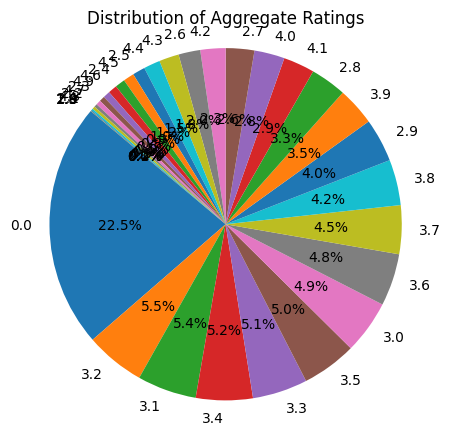

In [5]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Aggregate Ratings')
plt.show()

In [6]:
# Determine the most common rating range
most_common_rating = rating_counts.idxmax()
print(f"The most common aggregate rating is: {most_common_rating}")

The most common aggregate rating is: 0.0


In [7]:
# Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()
print(f"The average number of votes received by restaurants is: {average_votes:.2f}")

The average number of votes received by restaurants is: 156.91


**LEVEL 2 : TASK 2**

In [8]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
common_combinations = df['Cuisines'].str.split(', ').explode()
common_combinations_count = common_combinations.value_counts().head(10)

print(common_combinations_count) 


Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


In [10]:
average_ratings = df.groupby('Cuisines')['Aggregate rating'].mean()
print(average_ratings)

Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64


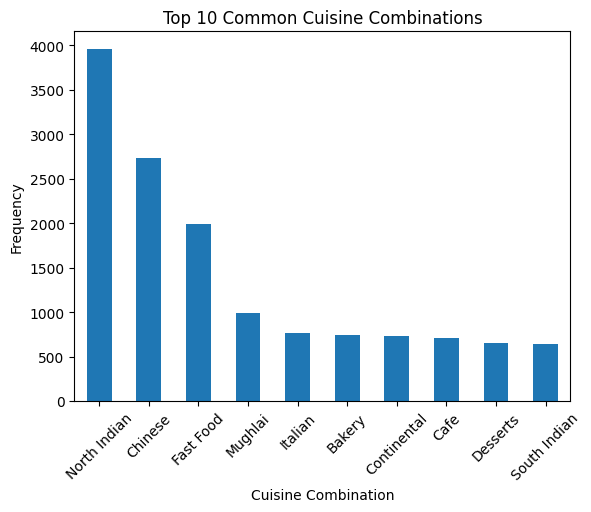

In [12]:

# Task 1: Identify the most common combinations of cuisines
# Split the 'Cuisines' column into a list of cuisines
df['Cuisine List'] = df['Cuisines'].str.split(', ')
# Create a list of all unique cuisine combinations
cuisine_combinations = df['Cuisine List'].explode().value_counts()

# Plot the top 10 most common cuisine combinations
top_10_combinations = cuisine_combinations.head(10)
top_10_combinations.plot(kind='bar', xlabel='Cuisine Combination', ylabel='Frequency', title='Top 10 Common Cuisine Combinations')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Task 2: Determine if certain cuisine combinations tend to have higher ratings
# Group by cuisine combinations and calculate the average rating for each combination
average_ratings = df.groupby('Cuisine List')['Aggregate rating'].mean().sort_values(ascending=False)

# Plot the top 10 cuisine combinations with the highest average ratings
top_10_ratings = average_ratings.head(10)
top_10_ratings.plot(kind='bar', xlabel='Cuisine Combination', ylabel='Average Rating', title='Top 10 Cuisine Combinations with Highest Average Ratings')
plt.xticks(rotation=45)
plt.show()

TypeError: unhashable type: 'list'